In [245]:
#render figures inline.
%matplotlib inline  

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")
seed = 42
np.random.seed(seed) 

# Exploratory Data Analysis

In [246]:
# from google.colab import drive
# drive.mount('/content/drive')

In [247]:
import datetime
now = datetime.datetime.now()
timestamp = now.strftime("%Y-%m-%d")

In [248]:
# dir = '/content/drive/MyDrive/Work/Omdena/Ethiopia NLP/project/Ethiopian-languages-DS/'
# data_dir = dir + 'data/'
# reports_dir = dir + 'reports/' + timestamp + '/'

In [249]:
dir = '../'
data_dir = dir + 'data/'
reports_dir = dir + 'reports/' + timestamp + '/'

In [250]:
import os
if not os.path.exists(reports_dir):
    os.makedirs(reports_dir)

In [251]:
path = data_dir + 'Amharic_corpus_merged_2023-04-16.csv'
data = pd.read_csv(path)

data = shuffle(data)
data.head()

,article,category
57065,\n\n\nማክሰኞ ሰኔ 7 ቀን 2014 ዓ.ም. በሕዝብ ተወካዮች ምክር ቤት...,Politics
9169,አዲስ አበባ ፣ ሚያዚያ 24 ፣ 2012 (ኤፍ ቢ ሲ) ገቢው የኮሮና ቫይረ...,Local News
9807,ጎንደር ላይ በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ...,Sports
60678,\n\n\nየሕዝብ ተወካዮች ምክር ቤት ‹‹በሕግ ተመራቂ ተማሪዎች የመውጫ ...,Politics
44025,በኢትዮጵያ ፕሪምየር ሊግ 16ኛ ሳምንት ድሬዳዋ ላይ ድሬዳዋ ከተማ ከ ኢት...,Sports


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61915 entries, 57065 to 56422
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   61915 non-null  object
 1   category  61915 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [253]:
data.category.value_counts()

Local News            20674
Politics              14481
Sports                10411
Business               9170
International News     6543
Entertainment           635
Others                    1
Name: category, dtype: int64

In [254]:
data.category.unique()

array(['Politics', 'Local News', 'Sports', 'Business',
       'International News', 'Entertainment', 'Others'], dtype=object)

Those are:

['Politics', 'Local News', 'Sports', 'International News', 'Business', 'Entertainment']

In [255]:
# df = data.copy()
# d_replace = {'ፖለቲካ':'Politics', 'ሀገር አቀፍ ዜና':'Local News', 'ስፖርት':'Sports', 'ዓለም አቀፍ ዜና':'International News', 'ቢዝነስ':'Business', 'መዝናኛ':'Entertainment', np.nan:'Others'}
# df.category = df.category.map(d_replace)
# df.sample(10)

In [14]:
# cat_labels = df.category.unique()
# cat_labels

array(['Politics', 'Local News', 'Sports', 'International News',
       'Business', 'Entertainment', 'Others'], dtype=object)

In [15]:
# data = df.copy()    # back to normal dataframe

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61915 entries, 57065 to 56422
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   61915 non-null  object
 1   category  61915 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [257]:
data.isna().sum()

article     0
category    0
dtype: int64

In [18]:
# data = data.dropna(subset=['article'])

In [258]:
data.category.value_counts()

Local News            20674
Politics              14481
Sports                10411
Business               9170
International News     6543
Entertainment           635
Others                    1
Name: category, dtype: int64

We will remove Others and Entertainment due to problems in inbalanced data.

In [259]:
df = data[(data.category != 'Entertainment') & (data.category != 'Others')]
df.category.unique()

array(['Politics', 'Local News', 'Sports', 'Business',
       'International News'], dtype=object)

In [260]:
data = df.copy()

In [261]:
data['word_len'] = data['article'].str.split().str.len()
data.head()

,article,category,word_len
57065,\n\n\nማክሰኞ ሰኔ 7 ቀን 2014 ዓ.ም. በሕዝብ ተወካዮች ምክር ቤት...,Politics,997
9169,አዲስ አበባ ፣ ሚያዚያ 24 ፣ 2012 (ኤፍ ቢ ሲ) ገቢው የኮሮና ቫይረ...,Local News,59
9807,ጎንደር ላይ በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ...,Sports,530
60678,\n\n\nየሕዝብ ተወካዮች ምክር ቤት ‹‹በሕግ ተመራቂ ተማሪዎች የመውጫ ...,Politics,374
44025,በኢትዮጵያ ፕሪምየር ሊግ 16ኛ ሳምንት ድሬዳዋ ላይ ድሬዳዋ ከተማ ከ ኢት...,Sports,254


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61279 entries, 57065 to 56422
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   61279 non-null  object
 1   category  61279 non-null  object
 2   word_len  61279 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [263]:
data.word_len.mean()

297.49873529267774

# character level normalization

Amharic has characters wich have the same sound that can be interchangably used.

for example letters 'ሃ','ኅ','ኃ','ሐ','ሓ','ኻ','ሀ' have the same sound so we change them to 'ሀ' 

In [264]:
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep=re.sub('[ሑኁዅ]','ሁ',rep)
    rep=re.sub('[ኂሒኺ]','ሂ',rep)
    rep=re.sub('[ኌሔዄ]','ሄ',rep)
    rep=re.sub('[ሕኅ]','ህ',rep)
    rep=re.sub('[ኆሖኾ]','ሆ',rep)
    rep=re.sub('[ሠ]','ሰ',rep)
    rep=re.sub('[ሡ]','ሱ',rep)
    rep=re.sub('[ሢ]','ሲ',rep)
    rep=re.sub('[ሣ]','ሳ',rep)
    rep=re.sub('[ሤ]','ሴ',rep)
    rep=re.sub('[ሥ]','ስ',rep)
    rep=re.sub('[ሦ]','ሶ',rep)
    rep=re.sub('[ዓኣዐ]','አ',rep)
    rep=re.sub('[ዑ]','ኡ',rep)
    rep=re.sub('[ዒ]','ኢ',rep)
    rep=re.sub('[ዔ]','ኤ',rep)
    rep=re.sub('[ዕ]','እ',rep)
    rep=re.sub('[ዖ]','ኦ',rep)
    rep=re.sub('[ጸ]','ፀ',rep)
    rep=re.sub('[ጹ]','ፁ',rep)
    rep=re.sub('[ጺ]','ፂ',rep)
    rep=re.sub('[ጻ]','ፃ',rep)
    rep=re.sub('[ጼ]','ፄ',rep)
    rep=re.sub('[ጽ]','ፅ',rep)
    rep=re.sub('[ጾ]','ፆ',rep)

    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
    rep=re.sub('(ሉ[ዋአ])','ሏ',rep)
    rep=re.sub('(ሙ[ዋአ])','ሟ',rep)
    rep=re.sub('(ቱ[ዋአ])','ቷ',rep)
    rep=re.sub('(ሩ[ዋአ])','ሯ',rep)
    rep=re.sub('(ሱ[ዋአ])','ሷ',rep)
    rep=re.sub('(ሹ[ዋአ])','ሿ',rep)
    rep=re.sub('(ቁ[ዋአ])','ቋ',rep)
    rep=re.sub('(ቡ[ዋአ])','ቧ',rep)
    rep=re.sub('(ቹ[ዋአ])','ቿ',rep)
    rep=re.sub('(ሁ[ዋአ])','ኋ',rep)
    rep=re.sub('(ኑ[ዋአ])','ኗ',rep)
    rep=re.sub('(ኙ[ዋአ])','ኟ',rep)
    rep=re.sub('(ኩ[ዋአ])','ኳ',rep)
    rep=re.sub('(ዙ[ዋአ])','ዟ',rep)
    rep=re.sub('(ጉ[ዋአ])','ጓ',rep)
    rep=re.sub('(ደ[ዋአ])','ዷ',rep)
    rep=re.sub('(ጡ[ዋአ])','ጧ',rep)
    rep=re.sub('(ጩ[ዋአ])','ጯ',rep)
    rep=re.sub('(ጹ[ዋአ])','ጿ',rep)
    rep=re.sub('(ፉ[ዋአ])','ፏ',rep)
    rep=re.sub('[ቊ]','ቁ',rep) #ቁ can be written as ቊ
    rep=re.sub('[ኵ]','ኩ',rep) #ኩ can be also written as ኵ  
    return rep


In [265]:
data['article'] = data['article'].str.replace(r'[^\w\s]','')

In [266]:
data['article'] = data['article'].apply(lambda x: normalize_char_level_missmatch(x))

In [267]:
n_data = data[['article','category']]
n_data.head()

,article,category
57065,\n\n\nማክሰኞ ሰኔ 7 ቀን 2014 አም በህዝብ ተወካዮች ምክር ቤት 1...,Politics
9169,አዲስ አበባ ሚያዚያ 24 2012 ኤፍ ቢ ሲ ገቢው የኮሮና ቫይረስን ለ...,Local News
9807,ጎንደር ላይ በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ...,Sports
60678,\n\n\nየህዝብ ተወካዮች ምክር ቤት በህግ ተመራቂ ተማሪዎች የመውጫ ፈተ...,Politics
44025,በኢትዮጵያ ፕሪምየር ሊግ 16ኛ ሳምንት ድሬዳዋ ላይ ድሬዳዋ ከተማ ከ ኢት...,Sports


## Tokenization and Segmentation

[reference]('https://github.com/uhh-lt/amharicprocessor')

In [268]:
# pip install amseg

In [269]:
# from amseg.amharicSegmenter import AmharicSegmenter
# sent_punct = []
# word_punct = []
# segmenter = AmharicSegmenter(sent_punct,word_punct)
# words = segmenter.amharic_tokenizer("እአበበ በሶ በላ።")
# sentences = segmenter.tokenize_sentence("እአበበ በሶ በላ። ከበደ ጆንያ፤ ተሸከመ፡!ለምን?")

In [270]:
n_data['article'][0]

'አባስ ሁሴን በዋሺንግተን ዲሲ እና አካባቢዎ ከ20 አመት በላይ የኖረ ትውልደ ኢትዮጵያዊ ነው አባስ ከሚታወቅበት የንግድ እንቅስቃሴ በተጨማሪ ትውልደኢትዮጵያዊያንን በሚያግዙ የበጎ አድራጎት ስራዎችም ንቁ ተሳታፊነቱ ይታወቃል የኮቪድ 19 መስፋፋትን ተከትሎ አባስ እንደለመደው ከኢትዮጵያ ዲያስፖራ ሙስሊም ማህበረሰብ ጋር ተሰባስቦ የኢድ አል አድሀን በአል ማክበር ባይችልም ያለፉ በአሎችን ትዝታዎች እየዘከረ ከቤተሰቦቹ ጋር በአሉን ለማሳለፍ እንደጣረ ለአሜሪካ ድምፅ ራዲዮ ተናግሯል\n'

In [271]:
from nltk.tokenize import word_tokenize

text = n_data['article'][0]
word_token = word_tokenize(text)
word_token

['አባስ',
 'ሁሴን',
 'በዋሺንግተን',
 'ዲሲ',
 'እና',
 'አካባቢዎ',
 'ከ20',
 'አመት',
 'በላይ',
 'የኖረ',
 'ትውልደ',
 'ኢትዮጵያዊ',
 'ነው',
 'አባስ',
 'ከሚታወቅበት',
 'የንግድ',
 'እንቅስቃሴ',
 'በተጨማሪ',
 'ትውልደኢትዮጵያዊያንን',
 'በሚያግዙ',
 'የበጎ',
 'አድራጎት',
 'ስራዎችም',
 'ንቁ',
 'ተሳታፊነቱ',
 'ይታወቃል',
 'የኮቪድ',
 '19',
 'መስፋፋትን',
 'ተከትሎ',
 'አባስ',
 'እንደለመደው',
 'ከኢትዮጵያ',
 'ዲያስፖራ',
 'ሙስሊም',
 'ማህበረሰብ',
 'ጋር',
 'ተሰባስቦ',
 'የኢድ',
 'አል',
 'አድሀን',
 'በአል',
 'ማክበር',
 'ባይችልም',
 'ያለፉ',
 'በአሎችን',
 'ትዝታዎች',
 'እየዘከረ',
 'ከቤተሰቦቹ',
 'ጋር',
 'በአሉን',
 'ለማሳለፍ',
 'እንደጣረ',
 'ለአሜሪካ',
 'ድምፅ',
 'ራዲዮ',
 'ተናግሯል']

## Stop Words

In [272]:
sw_path = data_dir + 'consolidated_stop_words_2023.csv'

sw_list = []
with open(sw_path, mode='r', encoding='utf-8') as f:
    reader = f.readlines()
    for line in  reader:
        sw_list.append(line.strip())

#skip the first line (header)
sw_list = sw_list[1:]
sw_list[:10]

['ይኖረዋል',
 'እላችኋለሁ',
 'አጠናቀዋል',
 'አልቀረበም',
 'ሆይ',
 'አልታየም',
 'አስገብተዋል',
 'አትቷል',
 'ይከፍታል',
 'የለም']

In [273]:
len(sw_list)

714

In [274]:
stopwords = sw_list

def clean_text(text):
    from nltk.tokenize import word_tokenize
    word_token = word_tokenize(text)
    tokens_without_punc = [w for w in word_token if w.isalnum()] # .isalnum() for number and text
    token_without_sw = [t for t in tokens_without_punc if t not in stopwords] # if you make a sentiment analysis , you can't remove 
                                                                           # negative auxiliary verb
    return ' '.join(token_without_sw)

clean_text(n_data['article'][0])

'አባስ ሁሴን በዋሺንግተን ዲሲ አካባቢዎ ከ20 አመት የኖረ ትውልደ ኢትዮጵያዊ አባስ ከሚታወቅበት የንግድ እንቅስቃሴ በተጨማሪ ትውልደኢትዮጵያዊያንን በሚያግዙ የበጎ አድራጎት ስራዎችም ንቁ ተሳታፊነቱ የኮቪድ 19 መስፋፋትን ተከትሎ አባስ እንደለመደው ከኢትዮጵያ ዲያስፖራ ሙስሊም ማህበረሰብ ተሰባስቦ የኢድ አድሀን በአል ማክበር ባይችልም ያለፉ በአሎችን ትዝታዎች እየዘከረ ከቤተሰቦቹ በአሉን ለማሳለፍ እንደጣረ ለአሜሪካ ድምፅ ራዲዮ'

In [275]:
n_data['article'] = n_data['article'].apply(clean_text)

In [276]:
n_data['article'][:3]

57065    ማክሰኞ ሰኔ 7 ቀን 2014 በህዝብ ተወካዮች ምክር ቤት 13ኛ መደበኛ ስ...
9169     አዲስ አበባ ሚያዚያ 24 2012 ኤፍ ገቢው የኮሮና ቫይረስን ለመከላከል ...
9807     ጎንደር በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ ቃሲ...
Name: article, dtype: object

In [277]:
text,label = data['article'].values , data['category'].values

## Model Evaluation

In [278]:
# from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [279]:
def print_eval(title, model, X_train, X_test, y_train, y_test):
    from sklearn.metrics import confusion_matrix, classification_report

    print(title)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))

    print("Test_Set")
    print(classification_report(y_test, y_pred)) #, target_names=cat_labels))

    print("Train_Set")
    print(classification_report(y_train, y_pred_train)) #, target_names=cat_labels))
    

# Count Vectorizer

In [280]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(analyzer='word',max_features=1000, ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
Y = label.copy()
X, Y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
        'Business'], dtype=object))

In [281]:
# unique_label = list(set(label))
# Y= []
# for i in label:
#     Y.append(unique_label.index(i))

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

## Gaussian Naive Bayes 

In [283]:
method_name = 'GaussianNB'

In [284]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6215731070496083

In [285]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

GaussianNB
[[1300   86  377   88    5]
 [   7 1158   72   30   13]
 [ 340 1221 1991  479  129]
 [ 205  398 1022 1273   18]
 [  11   97   32    8 1896]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.70      0.70      0.70      1856
International News       0.39      0.90      0.55      1280
        Local News       0.57      0.48      0.52      4160
          Politics       0.68      0.44      0.53      2916
            Sports       0.92      0.93      0.92      2044

          accuracy                           0.62     12256
         macro avg       0.65      0.69      0.64     12256
      weighted avg       0.65      0.62      0.62     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.71      0.72      0.71      7314
International News       0.40      0.91      0.56      5263
        Local News       0.59      0.49      0.53     16514
          Politics       0.70      0.44      

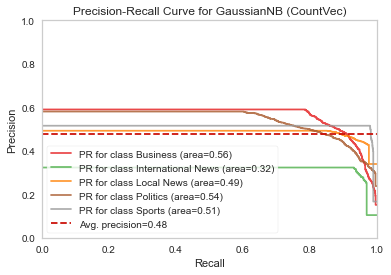

In [286]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    GaussianNB(),
    classes=classifier.classes_,
    title="Precision-Recall Curve for GaussianNB (CountVec)", 
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [287]:
score = viz.score(X_test, y_test)
score

0.4765447091338297

We will specify a feature to increase success rate.

In [288]:
feature = 'Business'

In [289]:
def store_result(title, feature, y, y_pred, visualizer):
  from sklearn.metrics import f1_score, recall_score
  d = {"Model":[], "F1_score": [], "Recall_score":[], "Prec_Recall_score":[]}
  d["Model"].append(title)

  f1_ = f1_score(y, y_pred, labels=[feature], average=None)[0]
  d["F1_score"].append(f1_)

  recall_ = recall_score(y, y_pred, labels=[feature], average=None)[0]
  d["Recall_score"].append(recall_)

  d["Prec_Recall_score"].append(visualizer.score_[feature])

  df = pd.DataFrame(d)

  filename = reports_dir + 'Results_' + feature + '.csv'

  import os
  if not os.path.isfile(filename):
    df.to_csv(filename, header=d.keys(), index=False)  
  else:         
    df.to_csv(filename, mode='a', header=False, index=False)

In [290]:
def read_results():
    return pd.read_csv(reports_dir, index=False)

In [291]:
# all_models = {"Model":[], "F1_score": [], "Recall_score":[], "Prec_Recall_score":[]}
store_result(method_name, feature, y_test, y_pred, viz)

## Multinomial NB

In [292]:
method_name = 'Multinomial NB'

In [293]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=3)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7234007832898173

In [294]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

Multinomial NB
[[1453   33  236  131    3]
 [  40  961  122  136   21]
 [ 307  328 2794  694   37]
 [ 231  287  608 1787    3]
 [   8   25  120   20 1871]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.71      0.78      0.75      1856
International News       0.59      0.75      0.66      1280
        Local News       0.72      0.67      0.70      4160
          Politics       0.65      0.61      0.63      2916
            Sports       0.97      0.92      0.94      2044

          accuracy                           0.72     12256
         macro avg       0.73      0.75      0.73     12256
      weighted avg       0.73      0.72      0.72     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.72      0.79      0.75      7314
International News       0.58      0.74      0.65      5263
        Local News       0.71      0.68      0.69     16514
          Politics       0.65      0.61  

In [295]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = MultinomialNB(alpha=3)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.722028
test_precision-neg    0.715393
test_recall-neg       0.785481
test_f1-neg           0.748750
dtype: float64

In [296]:
classifier.classes_

array(['Business', 'International News', 'Local News', 'Politics',
       'Sports'], dtype='<U18')

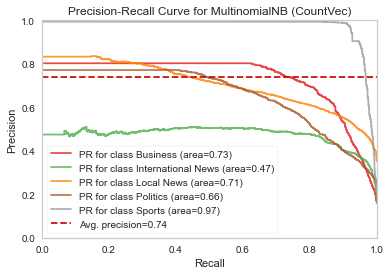

In [297]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    title="Precision-Recall Curve for MultinomialNB (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [298]:
store_result(method_name, feature, y_test, y_pred, viz)

## Logistic  Regression

In [299]:
method_name = 'LogisticReg CntVec'

In [300]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8003426892950392

In [301]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

LogisticReg CntVec
[[1405   26  251  168    6]
 [   2 1015  221   33    9]
 [ 152  258 3336  382   32]
 [ 151  113  539 2104    9]
 [   0   56   34    5 1949]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.82      0.76      0.79      1856
International News       0.69      0.79      0.74      1280
        Local News       0.76      0.80      0.78      4160
          Politics       0.78      0.72      0.75      2916
            Sports       0.97      0.95      0.96      2044

          accuracy                           0.80     12256
         macro avg       0.81      0.81      0.80     12256
      weighted avg       0.80      0.80      0.80     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.85      0.78      0.82      7314
International News       0.73      0.83      0.78      5263
        Local News       0.79      0.82      0.80     16514
          Politics       0.80      0.

In [302]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.793893
test_precision-neg    0.814185
test_recall-neg       0.745695
test_f1-neg           0.778342
dtype: float64

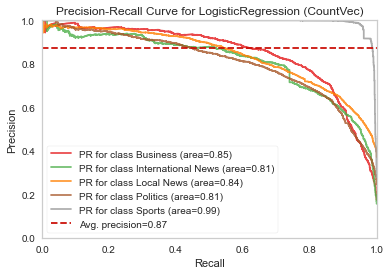

In [303]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    title="Precision-Recall Curve for LogisticRegression (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [304]:
store_result(method_name, feature, y_test, y_pred, viz)

## SVM

In [305]:
method_name = 'SVM CntVec C=1'

In [306]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(C=0.2)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7983028720626631

In [307]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

SVM CntVec C=1
[[1408   28  252  163    5]
 [   6  984  245   37    8]
 [ 147  246 3337  401   29]
 [ 153  116  521 2114   12]
 [   3   54   41    5 1941]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.82      0.76      0.79      1856
International News       0.69      0.77      0.73      1280
        Local News       0.76      0.80      0.78      4160
          Politics       0.78      0.72      0.75      2916
            Sports       0.97      0.95      0.96      2044

          accuracy                           0.80     12256
         macro avg       0.80      0.80      0.80     12256
      weighted avg       0.80      0.80      0.80     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.85      0.78      0.82      7314
International News       0.72      0.80      0.76      5263
        Local News       0.78      0.82      0.80     16514
          Politics       0.80      0.74  

In [308]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = LinearSVC(C=0.2)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.793974
test_precision-neg    0.823183
test_recall-neg       0.752120
test_f1-neg           0.785973
dtype: float64

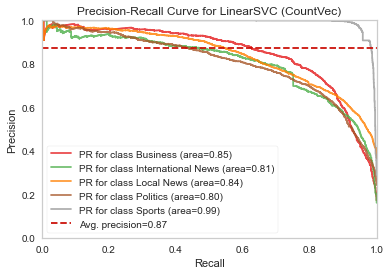

In [309]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.2),
    title="Precision-Recall Curve for LinearSVC (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [310]:
store_result(method_name, feature, y_test, y_pred, viz)

## Random Forest

In [311]:
method_name = 'RandomForest CntVec'

In [312]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8141318537859008

In [313]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

RandomForest CntVec
[[1457   19  273  103    4]
 [   7  843  374   50    6]
 [ 140  120 3527  353   20]
 [  91   62  532 2225    6]
 [   1    5  107    5 1926]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.86      0.79      0.82      1856
International News       0.80      0.66      0.72      1280
        Local News       0.73      0.85      0.79      4160
          Politics       0.81      0.76      0.79      2916
            Sports       0.98      0.94      0.96      2044

          accuracy                           0.81     12256
         macro avg       0.84      0.80      0.82     12256
      weighted avg       0.82      0.81      0.81     12256

Train_Set
                    precision    recall  f1-score   support

          Business       1.00      0.98      0.99      7314
International News       0.94      0.93      0.94      5263
        Local News       0.94      0.99      0.96     16514
          Politics       1.00      0

There is an overfit in the model. We will try to find best parameters to overcome overfitting.

In [314]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1600, 
                                    max_depth=15, 
                                    random_state = 42, 
                                    n_jobs = -1)

"""
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
"""

classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

RandomForest CntVec
[[1278    1  423  150    4]
 [   9   18 1196   45   12]
 [ 109    0 3751  282   18]
 [ 107    1 1060 1744    4]
 [   1    0  153    3 1887]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.85      0.69      0.76      1856
International News       0.90      0.01      0.03      1280
        Local News       0.57      0.90      0.70      4160
          Politics       0.78      0.60      0.68      2916
            Sports       0.98      0.92      0.95      2044

          accuracy                           0.71     12256
         macro avg       0.82      0.63      0.62     12256
      weighted avg       0.77      0.71      0.68     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.95      0.76      0.84      7314
International News       1.00      0.04      0.08      5263
        Local News       0.59      0.94      0.73     16514
          Politics       0.86      0

In [315]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.806275
test_precision-neg    0.854979
test_recall-neg       0.782884
test_f1-neg           0.817291
dtype: float64

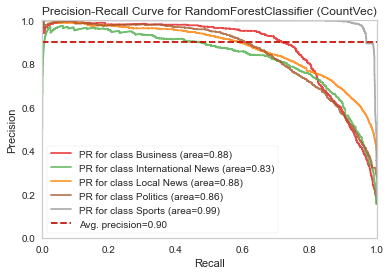

In [316]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1),
    title="Precision-Recall Curve for RandomForestClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [317]:
store_result(method_name, feature, y_test, y_pred, viz)

## Adaboost

In [318]:
method_name = 'Adaboost CntVec'

In [319]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators= 500, random_state = 42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7159758485639687

In [320]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

Adaboost CntVec
[[1447   39  179  186    5]
 [  20  975  212   57   16]
 [ 503  350 2685  590   32]
 [ 316  259  602 1733    6]
 [   0    8   93    8 1935]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.63      0.78      0.70      1856
International News       0.60      0.76      0.67      1280
        Local News       0.71      0.65      0.68      4160
          Politics       0.67      0.59      0.63      2916
            Sports       0.97      0.95      0.96      2044

          accuracy                           0.72     12256
         macro avg       0.72      0.75      0.73     12256
      weighted avg       0.72      0.72      0.72     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.64      0.78      0.70      7314
International News       0.59      0.76      0.66      5263
        Local News       0.71      0.64      0.67     16514
          Politics       0.68      0.59 

In [321]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.704812
test_precision-neg    0.626935
test_recall-neg       0.788351
test_f1-neg           0.698137
dtype: float64

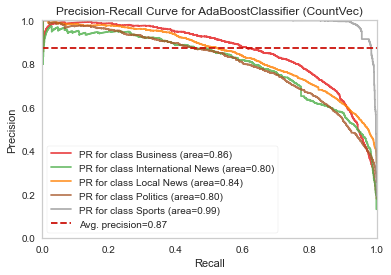

In [322]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    title="Precision-Recall Curve for AdaBoostClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);
# plt.savefig(path)

In [323]:
store_result(method_name, feature, y_test, y_pred, viz)

## XGBoost

In [324]:
method_name = 'XGBoost CntVec'

In [325]:
Y

array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
       'Business'], dtype=object)

In [326]:
np.unique(Y)

array(['Business', 'International News', 'Local News', 'Politics',
       'Sports'], dtype=object)

In [327]:
d_replace = { "Business": 0,
    "International News": 1,
            "Local News": 2,
              "Politics": 3,
                "Sports": 4,
                # "Entertainment": 5,
                # "Others": 6 
                }

Y_ = pd.Series(Y).map(d_replace).to_numpy(dtype=int)
np.unique(Y_)

array([0, 1, 2, 3, 4])

In [328]:
# df = data.copy()

# df.category = Y_
# # df.category = df.category.astype(int)
# df.sample(10)

In [329]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_     , stratify=Y_, test_size=0.2, random_state=42)

In [330]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

[21:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8355907310704961

In [331]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

XGBoost CntVec
[[1500   11  192  128    3]
 [  12 1045  201   38   13]
 [ 144  188 3456  322   25]
 [ 112   89  430 2259    6]
 [   1    9   85    6 1981]]
Test_Set
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1834
           1       0.78      0.80      0.79      1309
           2       0.79      0.84      0.81      4135
           3       0.82      0.78      0.80      2896
           4       0.98      0.95      0.96      2082

    accuracy                           0.84     12256
   macro avg       0.84      0.84      0.84     12256
weighted avg       0.84      0.84      0.84     12256

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7336
           1       0.85      0.88      0.87      5234
           2       0.87      0.91      0.89     16539
           3       0.92      0.89      0.91     11585
           4       0.99      0.96      0.98      8329

    accura

We have an overfitting here. The result of test set is lower than train set. Accuracy has 10 percent difference which means overfitting.

In [332]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# # scoring = {'accuracy': make_scorer(accuracy_score),
# #             'precision-neg': make_scorer(precision_score, average=None, labels=features),
# #             'recall-neg': make_scorer(recall_score, average=None, labels = features),
# #             'f1-neg': make_scorer(f1_score, average=None, labels = features)}


# param_grid = {"n_estimators":[50, 100],
#              'max_depth':[3,4], 
#              "learning_rate": [0.1, 0.2],
#              "subsample":[0.5, 0.8], 
#              "colsample_bytree":[0.5,0.7]}
# njobs = 2
# xgb_model = XGBClassifier(random_state=42)
# xgb_grid = GridSearchCV(xgb_model, param_grid=param_grid, scoring="f1", refit=False, verbose=2, n_jobs = njobs)
# xgb_grid.fit(X_train, y_train)
# xgb_grid.best_params_

In [333]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth=3, random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

[21:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost CntVec
[[1425   28  221  157    3]
 [  14  992  234   56   13]
 [ 137  275 3329  371   23]
 [ 145  148  492 2102    9]
 [   1   55   65    4 1957]]
Test_Set
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1834
           1       0.66      0.76      0.71      1309
           2       0.77      0.81      0.79      4135
           3       0.78      0.73      0.75      2896
           4       0.98      0.94      0.96      2082

    accuracy                           0.80     12256
   macro avg       0.80      0.80      0.80     12256
weighted avg       0.80      0.80      0.80     12256

Train_Set
              precision  

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = XGBClassifier(max_depth=3, random_state=42)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[21:21:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:23:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

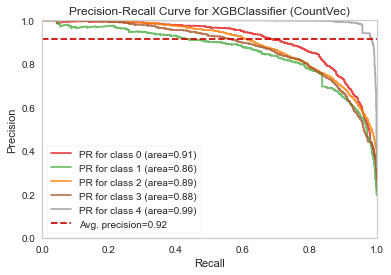

In [334]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    XGBClassifier(random_state=42),
    title="Precision-Recall Curve for XGBClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [335]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

# TF-IDF

In [337]:
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = TfidfVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
Y = label.copy()
X, Y

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.04269872, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
        'Business'], dtype=object))

In [338]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

## Gaussian Naive Bayes 

In [339]:
method_name = "GaussianNB TF-iDF"

In [340]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6950881201044387

In [341]:
print_eval(method_name, classifier,X_train, X_test, y_train, y_test)

GaussianNB TF-iDF
[[1591   31   74  129    9]
 [  66 1016   55  125   47]
 [ 627  563 1914  950   81]
 [ 316  306  236 2004   34]
 [   9   35   42    2 1994]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.61      0.87      0.72      1834
International News       0.52      0.78      0.62      1309
        Local News       0.82      0.46      0.59      4135
          Politics       0.62      0.69      0.66      2896
            Sports       0.92      0.96      0.94      2082

          accuracy                           0.70     12256
         macro avg       0.70      0.75      0.71     12256
      weighted avg       0.73      0.70      0.69     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.60      0.86      0.71      7336
International News       0.54      0.81      0.65      5234
        Local News       0.82      0.46      0.59     16539
          Politics       0.63      0.6

In [342]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = GaussianNB()
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.686861
test_precision-neg    0.594087
test_recall-neg       0.853328
test_f1-neg           0.700437
dtype: float64

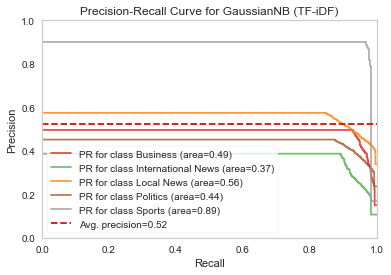

In [343]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    GaussianNB(),
    title="Precision-Recall Curve for GaussianNB (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [344]:
store_result(method_name, feature, y_test, y_pred, viz)

## Multinomial NB

In [345]:
method_name = 'MultinomialNB TF-iDF'

In [346]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=3)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7309889033942559

In [347]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

MultinomialNB TF-iDF
[[1430   11  256  136    1]
 [  60  579  393  253   24]
 [ 259   81 3177  592   26]
 [ 178  132  709 1868    9]
 [   6    9  140   22 1905]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.74      0.78      0.76      1834
International News       0.71      0.44      0.55      1309
        Local News       0.68      0.77      0.72      4135
          Politics       0.65      0.65      0.65      2896
            Sports       0.97      0.91      0.94      2082

          accuracy                           0.73     12256
         macro avg       0.75      0.71      0.72     12256
      weighted avg       0.73      0.73      0.73     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.73      0.76      0.74      7336
International News       0.72      0.48      0.58      5234
        Local News       0.67      0.75      0.71     16539
          Politics       0.65      

In [348]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = MultinomialNB(alpha=3)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.722824
test_precision-neg    0.726522
test_recall-neg       0.756953
test_f1-neg           0.741329
dtype: float64

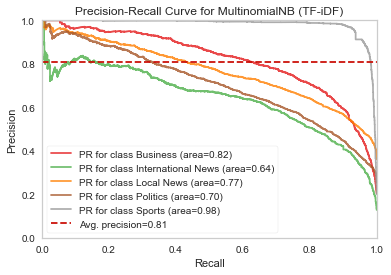

In [349]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    title="Precision-Recall Curve for MultinomialNB (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [350]:
store_result(method_name, feature, y_test, y_pred, viz)

## Logistic  Regression

In [351]:
method_name = 'LogisticReg TF-iDF'

In [352]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8010770234986945

In [353]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

LogisticReg TF-iDF
[[1470   20  185  157    2]
 [  16  960  235   80   18]
 [ 160  185 3303  460   27]
 [ 167  105  500 2115    9]
 [   4   48   56    4 1970]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.81      0.80      0.81      1834
International News       0.73      0.73      0.73      1309
        Local News       0.77      0.80      0.79      4135
          Politics       0.75      0.73      0.74      2896
            Sports       0.97      0.95      0.96      2082

          accuracy                           0.80     12256
         macro avg       0.81      0.80      0.80     12256
      weighted avg       0.80      0.80      0.80     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.81      0.79      0.80      7336
International News       0.75      0.75      0.75      5234
        Local News       0.78      0.81      0.79     16539
          Politics       0.76      0.

In [354]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.794341
test_precision-neg    0.790853
test_recall-neg       0.776172
test_f1-neg           0.783402
dtype: float64

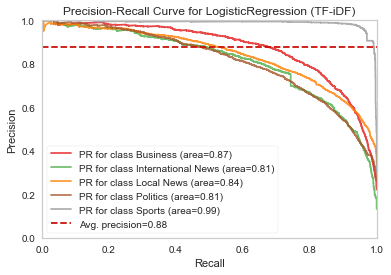

In [355]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    title="Precision-Recall Curve for LogisticRegression (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [356]:
store_result(method_name, feature, y_test, y_pred, viz)

## SVM

In [357]:
method_name = 'SVM TF-iDF'

In [358]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(C=0.1)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8006690600522193

In [359]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

SVM TF-iDF
[[1473   15  196  148    2]
 [  19  935  250   85   20]
 [ 166  162 3301  477   29]
 [ 170   88  509 2119   10]
 [   3    8   83    3 1985]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.80      0.80      0.80      1834
International News       0.77      0.71      0.74      1309
        Local News       0.76      0.80      0.78      4135
          Politics       0.75      0.73      0.74      2896
            Sports       0.97      0.95      0.96      2082

          accuracy                           0.80     12256
         macro avg       0.81      0.80      0.81     12256
      weighted avg       0.80      0.80      0.80     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.80      0.80      0.80      7336
International News       0.80      0.74      0.77      5234
        Local News       0.77      0.80      0.79     16539
          Politics       0.76      0.76      

In [360]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.796035
test_precision-neg    0.787061
test_recall-neg       0.783940
test_f1-neg           0.785454
dtype: float64

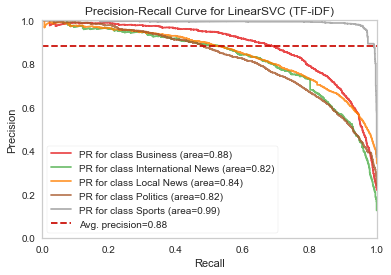

In [361]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    title="Precision-Recall Curve for LinearSVC (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [362]:
store_result(method_name, feature, y_test, y_pred, viz)

## Random Forest

In [363]:
method_name = 'RandomForest TF-iDF'

In [364]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(300, max_depth=15, random_state = 42, n_jobs = -1)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7164654046997389

In [365]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

RandomForest TF-iDF
[[1310    0  374  149    1]
 [  15   88 1137   51   18]
 [ 103    1 3725  285   21]
 [  97    1 1054 1737    7]
 [   0    0  159    2 1921]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.86      0.71      0.78      1834
International News       0.98      0.07      0.13      1309
        Local News       0.58      0.90      0.70      4135
          Politics       0.78      0.60      0.68      2896
            Sports       0.98      0.92      0.95      2082

          accuracy                           0.72     12256
         macro avg       0.83      0.64      0.65     12256
      weighted avg       0.78      0.72      0.69     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.95      0.76      0.84      7336
International News       0.97      0.11      0.19      5234
        Local News       0.61      0.94      0.74     16539
          Politics       0.86      0

In [366]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = ['Business']
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = RandomForestClassifier(300, max_depth=15, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.708504
test_precision-neg    0.850421
test_recall-neg       0.695065
test_f1-neg           0.764884
dtype: float64

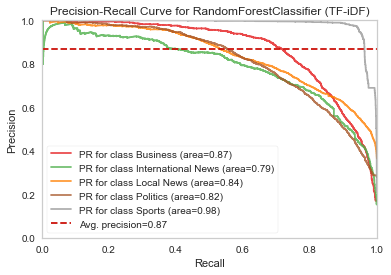

In [367]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    RandomForestClassifier(300, max_depth=15, random_state = 42, n_jobs = -1),
    title="Precision-Recall Curve for RandomForestClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [368]:
store_result(method_name, feature, y_test, y_pred, viz)

## Adaboost

In [369]:
method_name = 'Adaboost TF-iDF'

In [370]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators= 500, random_state = 42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.7239719321148825

In [371]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

Adaboost TF-iDF
[[1493   10  161  162    8]
 [  24  887  232  139   27]
 [ 510  301 2663  590   71]
 [ 364  125  517 1851   39]
 [   0   21   76    6 1979]]
Test_Set
                    precision    recall  f1-score   support

          Business       0.62      0.81      0.71      1834
International News       0.66      0.68      0.67      1309
        Local News       0.73      0.64      0.68      4135
          Politics       0.67      0.64      0.66      2896
            Sports       0.93      0.95      0.94      2082

          accuracy                           0.72     12256
         macro avg       0.72      0.75      0.73     12256
      weighted avg       0.73      0.72      0.72     12256

Train_Set
                    precision    recall  f1-score   support

          Business       0.61      0.81      0.70      7336
International News       0.67      0.70      0.69      5234
        Local News       0.74      0.64      0.69     16539
          Politics       0.68      0.64 

In [372]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

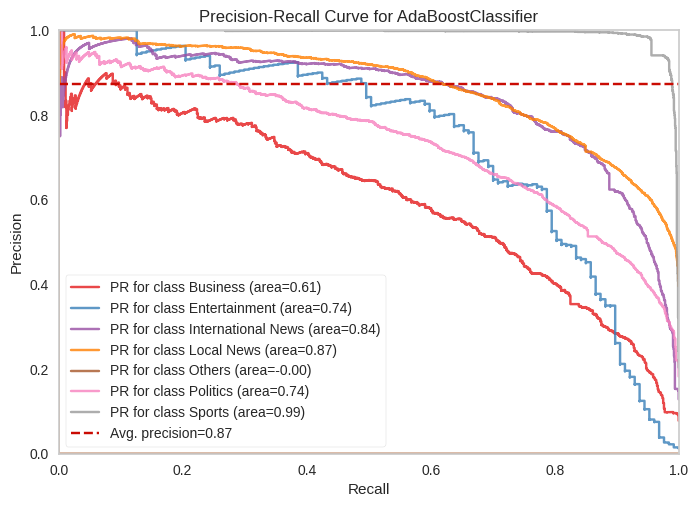

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    title="Precision-Recall Curve for AdaBoostClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

## XGBoost

In [ ]:
method_name = 'XGBoost TF-iDF'

In [ ]:
Y

array(['Politics', 'Local News', 'Local News', ..., 'Local News',
       'Sports', 'Local News'], dtype=object)

In [ ]:
np.unique(Y)

array(['Business', 'Entertainment', 'International News', 'Local News',
       'Others', 'Politics', 'Sports'], dtype=object)

In [ ]:
d_replace = { "Business": 0,
    "International News": 1,
            "Local News": 2,
              "Politics": 3,
                "Sports": 4,
        # "Entertainment": 5,
        #         "Others": 6 
                }

Y_ = pd.Series(Y).map(d_replace).to_numpy(dtype=int)
np.unique(Y_)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
# df = data.copy()

# df.category = Y_
# # df.category = df.category.astype(int)
# df.sample(10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_     , stratify=Y_    , test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8239292997960571

In [ ]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

XGBoost TF-iDF
[[ 454    1    8  226  111    2]
 [   2   87    2   36    0    0]
 [  10    1 1052  217   36    7]
 [ 102    8  136 3527  272   27]
 [  73    7   52  397 1346    3]
 [   1    2    3   69    2 2018]]
Test_Set
              precision    recall  f1-score   support

           0       0.71      0.57      0.63       802
           1       0.82      0.69      0.75       127
           2       0.84      0.80      0.82      1323
           3       0.79      0.87      0.83      4072
           4       0.76      0.72      0.74      1878
           5       0.98      0.96      0.97      2095

    accuracy                           0.82     10297
   macro avg       0.82      0.77      0.79     10297
weighted avg       0.82      0.82      0.82     10297

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      3092
           1       1.00      1.00      1.00       508
           2       0.92      0.93      0.92      5220
       

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=features),
            'recall-neg': make_scorer(recall_score, average=None, labels = features),
            'f1-neg': make_scorer(f1_score, average=None, labels = features)}

model = XGBClassifier(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy         0.819429
test_precision-neg    0.000000
test_recall-neg       0.000000
test_f1-neg           0.000000
dtype: float64

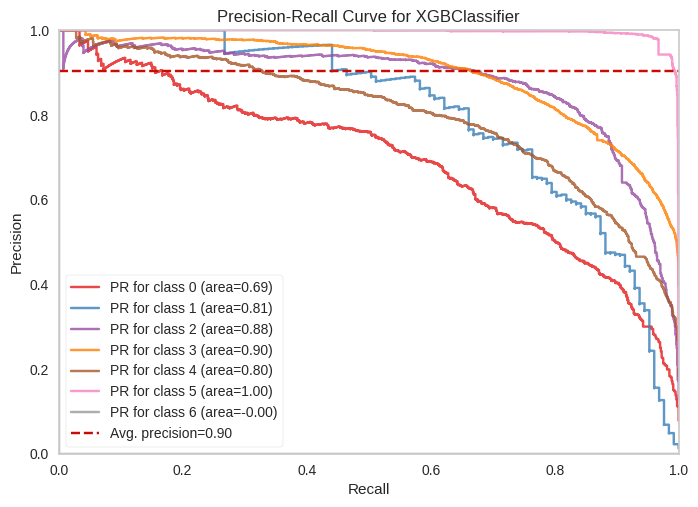

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    XGBClassifier(random_state=42),
    title="Precision-Recall Curve for XGBClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [ ]:
store_result(method_name, feature, y_test, y_pred, viz)

NameError: ignored

# Models Comparison

In [ ]:
results_df = read_results()
results_df

In [ ]:
def labels(ax):                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment


plt.figure(figsize=(7,10))

plt.subplot(311)
results_df = results_df.sort_values(by="Recall_score", ascending=False)
ax=sns.barplot(x="Recall_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)
ax.set_title("Performances for feature:" + feature)

plt.subplot(312)
results_df = results_df.sort_values(by="F1_score", ascending=False)
ax=sns.barplot(x="F1_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)

plt.subplot(313)
results_df = results_df.sort_values(by="Prec_Recall_score", ascending=False)
ax=sns.barplot(x="Prec_Recall_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)
# ax.set_title('subplot 1')


plt.show();